In [19]:
import torch
import dataset
from hparams import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dataset=dataset.SpeechAndNoiseDataset('train', AUDIO_DIR, SAMPLE_RATE, N_SAMPLES, FRAME_OFFSET, device='cpu')

In [3]:
flat = train_dataset[0][1].flatten()

In [4]:
flat.numpy().shape

(65536,)

In [5]:
flat.max()

tensor(16.2520)

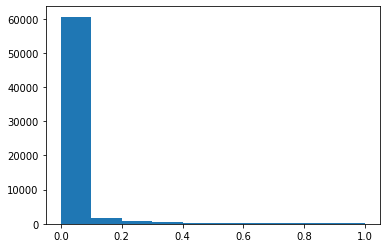

In [6]:
plt.hist(flat.numpy(), bins=10, range=(0, 1))
plt.show()

In [7]:
sample = train_dataset[0][1]

In [43]:
sample.shape

torch.Size([1, 128, 512])

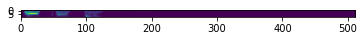

In [30]:
plt.imshow(sample.numpy()[0][:10])
plt.show()

In [27]:
normalized = (sample / 20 * 2 - 1).numpy()

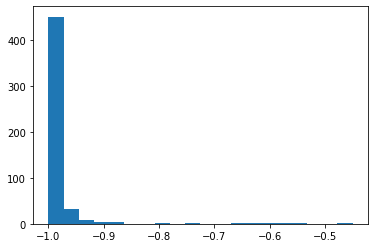

In [51]:
plt.hist(normalized[:, 10].flatten(), bins=20)
plt.show()

In [138]:
def get_mel_weights(shape):
    freqs = torch.arange(shape[0])
    weights = 2595 * torch.log10(1 + freqs/700)**1.5
    broadcasted = weights.flip(0).repeat(shape[1], 1).T
    return broadcasted

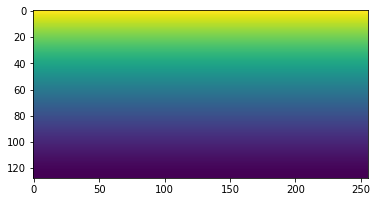

In [139]:
plt.imshow(get_mel_weights((128, 256)).numpy())
plt.show()

In [86]:
get_mel_weights((128, 256)).numpy()

array([[  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  1.6088796,   1.6088796,   1.6088796, ...,   1.6088796,
          1.6088796,   1.6088796],
       [  3.2153316,   3.2153316,   3.2153316, ...,   3.2153316,
          3.2153316,   3.2153316],
       ...,
       [185.16862  , 185.16862  , 185.16862  , ..., 185.16862  ,
        185.16862  , 185.16862  ],
       [186.53387  , 186.53387  , 186.53387  , ..., 186.53387  ,
        186.53387  , 186.53387  ],
       [187.89737  , 187.89737  , 187.89737  , ..., 187.89737  ,
        187.89737  , 187.89737  ]], dtype=float32)